# Dataset 1 - Supervised Machine Learning

## Import Libraries and Dataset 

In [1]:
# Data Pre-processing
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# ML Algorithm 1: Logistic Regression
from sklearn.linear_model import LogisticRegression

# ML Algorithm 2: Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.tree.export import export_text

# ML Algorithm 3: Neural Networks (Perceptron and MLP)
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Evaluation Metric 1: Cross-validation
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Evaluation Metric 2: ROC Curve and AuC
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

C:\Users\Aiden\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Load Dataset
dataset = pd.read_csv('framingham.csv')
dataset.head(1000)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,47,2.0,1,9.0,0.0,0,0,0,201.0,122.0,67.0,20.12,68.0,NaN,0
996,1,49,1.0,1,30.0,0.0,0,0,0,199.0,107.5,71.0,26.62,70.0,68.0,0
997,0,55,3.0,0,0.0,0.0,0,0,0,255.0,125.0,85.0,22.89,65.0,81.0,0
998,0,57,1.0,0,0.0,NaN,0,0,0,372.0,122.0,80.0,21.02,65.0,81.0,0


# Data Processing

###  (i) Feature Selection

In [3]:
dataset_clean = dataset

# Remove NaN
dataset_clean = dataset_clean.dropna()

# separate independent & dependent variables
ind_columns = dataset_clean.iloc[:,0:15]
dep_columns = dataset_clean.iloc[:,-1]   

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(ind_columns,dep_columns)
dataset_clean_scores = pd.DataFrame(fit.scores_)
dataset_clean_columns = pd.DataFrame(ind_columns.columns)

#join two dataframes for better visualization 
featureScores = pd.concat([dataset_clean_columns,dataset_clean_scores],axis=1)
featureScores.columns = ['Specs','Score']  
print('Chi-Square Scores for Feature Selection\n')
print(featureScores.nlargest(15,'Score'))  

dataset_clean_selected_features = dataset_clean[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]

Chi-Square Scores for Feature Selection

              Specs       Score
10            sysBP  669.136021
14          glucose  379.914235
1               age  296.200344
9           totChol  250.490205
4        cigsPerDay  155.798307
11            diaBP  142.521814
7      prevalentHyp   82.845455
8          diabetes   31.067621
5            BPMeds   28.191569
0              male   17.107751
12              BMI   15.785436
6   prevalentStroke    8.507833
2         education    7.733287
13        heartRate    2.917287
3     currentSmoker    0.686474


### (ii) Data Cleansing

In [4]:
# Glucose above 275
dataset_clean_selected_features = dataset_clean_selected_features.drop(dataset_clean[dataset_clean.glucose > 275].index)
# Cholestrol above 580
dataset_clean_selected_features = dataset_clean_selected_features.drop(dataset_clean[dataset_clean.totChol > 580].index) 
# sysBP above 275
dataset_clean_selected_features = dataset_clean_selected_features.drop(dataset_clean[dataset_clean.sysBP > 275].index)

# Machine Learning

## 1) Logistic Regression

### Pre-process Data - Feature Scaling

In [5]:
# Feature Scaling

scaler = MinMaxScaler(feature_range=(0,1)) 
dataset_clean_scaled = pd.DataFrame(scaler.fit_transform(dataset_clean_selected_features), columns=dataset_clean_selected_features.columns)

dataset_clean_scaled.describe()


# Split Dataset into Training and Testing

feature_names = dataset_clean_scaled.columns[0:10]
X = dataset_clean_scaled[feature_names]

# the target feature, i.e. diagnosis class
y = dataset_clean_scaled.TenYearCHD

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

#### Model Build

In [6]:
LR_1 = LogisticRegression(class_weight = 'balanced').fit(X_train, Y_train)
y_pred = LR_1.predict(X_test)

print('Accuracy Score on train data:', accuracy_score(y_true=Y_train, y_pred=LR_1.predict(X_train)))
print('Accuracy Score on test data:', accuracy_score(y_true=Y_test, y_pred=LR_1.predict(X_test)))

Accuracy Score on train data: 0.6738533908271266
Accuracy Score on test data: 0.6663619744058501


### Logistic Regression Evaluation: 1) Stratified k-fold CV 

C:\Users\Aiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Logistic Regression: 0.669941 (0.024839)


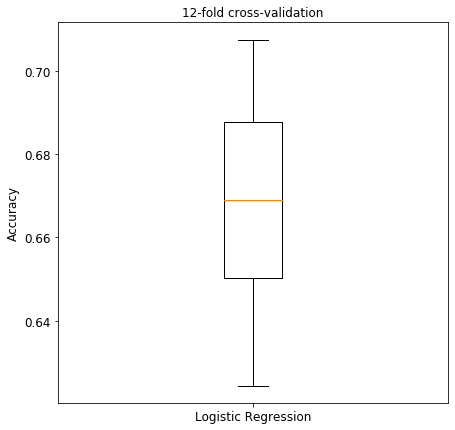

In [7]:
kfold = StratifiedKFold(n_splits=12, random_state=1)
cv_results = cross_val_score(LR_1, X_train, Y_train, cv=kfold, scoring='accuracy')
print('%s: %f (%f)' % ('Logistic Regression', cv_results.mean(), cv_results.std()))

labels = ['Logistic Regression']
plt.figure(figsize=(7,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize = 12)
pyplot.boxplot(cv_results, labels = labels)
plt.ylabel('Accuracy', fontsize = 12)
pyplot.title('12-fold cross-validation')
pyplot.show()

### Logistic Regression Evaluation: 2) ROC Curve

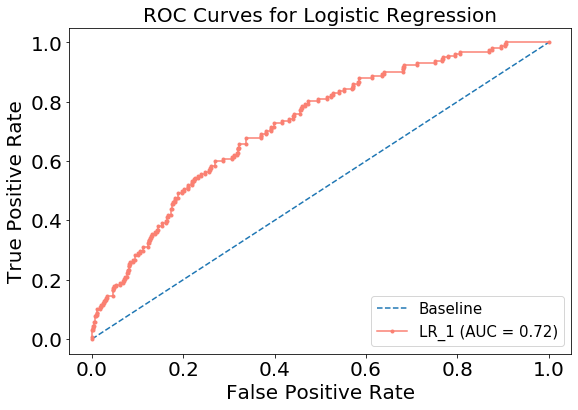

In [8]:
# generate a random prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]

# predict probabilities for different models
lr_probs1 = LR_1.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]

# calculate accuracy score for random prediction model
ns_auc = roc_auc_score(Y_test, ns_probs)

# calculate accuracy score different MLP models
lr_auc1 = roc_auc_score(Y_test, lr_probs1)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr1, lr_tpr1, _ = roc_curve(Y_test, lr_probs1)

# Configure plot size
plt.figure(figsize=(9,6))
plt.xticks(fontsize=20)
plt.yticks(fontsize = 20)

# axis labels
pyplot.xlabel('False Positive Rate', size = 20)
pyplot.ylabel('True Positive Rate', size = 20)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', label='LR_1 (AUC = {1:0.2f})'
            ''.format(1,lr_auc1), color = 'salmon')

# show the legend
pyplot.legend(prop={'size': 15}, loc = 'lower right')
plt.title('ROC Curves for Logistic Regression', size = 20)
# show the plot
pyplot.show()

## 2) Decision Tree

### Split Data into Training and Testing 

In [9]:
# Split Dataset into Training and Testing

feature_names = dataset_clean_selected_features.columns[0:10]
X = dataset_clean_selected_features[feature_names]

# the target feature, i.e. diagnosis class
y = dataset_clean_selected_features.TenYearCHD

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

### Model Building and Evaluation

In [10]:
# Model 1
DTree_1_entropy_NoPruning = DecisionTreeClassifier(criterion = 'entropy')
DTree_1_entropy_NoPruning.fit(X_train, Y_train)
y_pred =  DTree_1_entropy_NoPruning.predict(X_test)

print('Accuracy Score on train data:', accuracy_score(y_true=Y_train, y_pred=DTree_1_entropy_NoPruning.predict(X_train)))
print('Accuracy Score on test data:', accuracy_score(y_true=Y_test, y_pred=DTree_1_entropy_NoPruning.predict(X_test)))

Accuracy Score on train data: 1.0
Accuracy Score on test data: 0.7376599634369287


In [11]:
# Model 2
DTree_2_gini_NoPruning = DecisionTreeClassifier(criterion = 'gini')
DTree_2_gini_NoPruning.fit(X_train, Y_train)
y_pred =  DTree_2_gini_NoPruning.predict(X_test)

print('Accuracy Score on train data:', accuracy_score(y_true=Y_train, y_pred=DTree_2_gini_NoPruning.predict(X_train)))
print('Accuracy Score on test data:', accuracy_score(y_true=Y_test, y_pred=DTree_2_gini_NoPruning.predict(X_test)))

Accuracy Score on train data: 1.0
Accuracy Score on test data: 0.7559414990859232


#### Due to overfitting consider pruning the tree

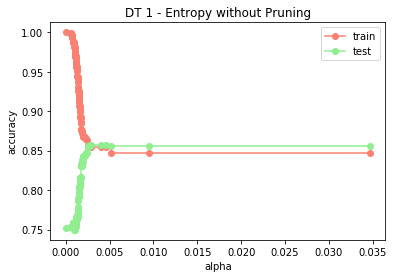

In [12]:
# Model 1 ccp_alphas

clf = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
path = clf.cost_complexity_pruning_path(X_train,Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion = 'entropy',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("DT 1 - Entropy without Pruning")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post", color = 'salmon')
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post", color = 'lightgreen')
ax.legend()
plt.show()

In [13]:
# Model 3
DTree_3_entropy_WithPruning = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.005)
DTree_3_entropy_WithPruning.fit(X_train, Y_train)
y_pred =  DTree_3_entropy_WithPruning.predict(X_test)

print('Accuracy Score on train data:', accuracy_score(y_true=Y_train, y_pred=DTree_3_entropy_WithPruning.predict(X_train)))
print('Accuracy Score on test data:', accuracy_score(y_true=Y_test, y_pred=DTree_3_entropy_WithPruning.predict(X_test)))

Accuracy Score on train data: 0.8545668365346922
Accuracy Score on test data: 0.8574040219378428


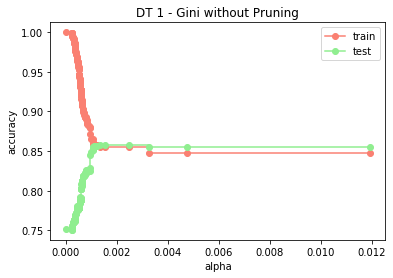

In [14]:
# Model 2 ccp_alphas

clf = DecisionTreeClassifier(criterion = 'gini', random_state=0)
path = clf.cost_complexity_pruning_path(X_train,Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion = 'gini',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("DT 1 - Gini without Pruning")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post", color = 'salmon')
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post", color = 'lightgreen')
ax.legend()
plt.show()

In [15]:
# Model 4
DTree_4_gini_WithPruning = DecisionTreeClassifier(criterion = 'gini', ccp_alpha = 0.005)
DTree_4_gini_WithPruning.fit(X_train, Y_train)
y_pred =  DTree_4_gini_WithPruning.predict(X_test)

print('Accuracy Score on train data:', accuracy_score(y_true=Y_train, y_pred=DTree_4_gini_WithPruning.predict(X_train)))
print('Accuracy Score on test data:', accuracy_score(y_true=Y_test, y_pred=DTree_4_gini_WithPruning.predict(X_test)))

Accuracy Score on train data: 0.8471187769502156
Accuracy Score on test data: 0.8555758683729433


### Decision Tree Evaluation: 1) Cross-Validation

C:\Users\Aiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Aiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


DTree 1: 0.755021 (0.025877)
DTree 2: 0.755426 (0.030725)


C:\Users\Aiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Aiden\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


DTree 3: 0.847510 (0.006795)
DTree 4: 0.847123 (0.002061)


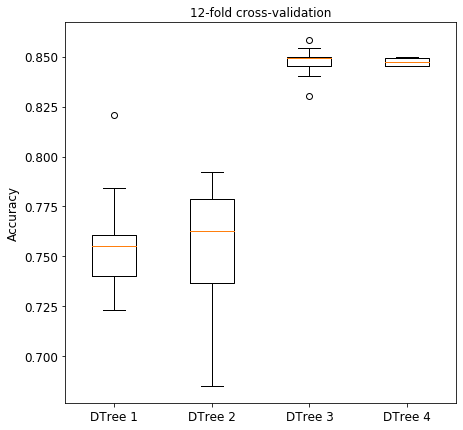

In [16]:
# Code adapted from Lab 3 Machine Learning and Data Mining
models = []
models.append(('DTree 1', DTree_1_entropy_NoPruning ))
models.append(('DTree 2', DTree_2_gini_NoPruning ))
models.append(('DTree 3', DTree_3_entropy_WithPruning ))
models.append(('DTree 4', DTree_4_gini_WithPruning ))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=12, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

plt.figure(figsize=(7,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize = 12)
pyplot.boxplot(results, labels=names)
plt.ylabel('Accuracy', fontsize = 12)
pyplot.title('12-fold cross-validation')
pyplot.show()

### Decision Tree Evaluation: 2) ROC Curve 

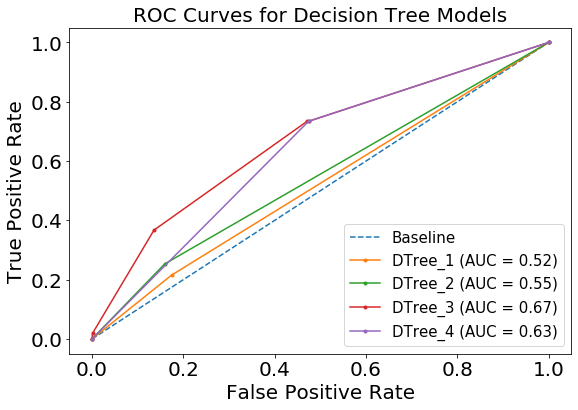

In [17]:
# Code adapted from Lab 3 Machine Learning and Data Mining

# generate a random prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]

# predict probabilities for different models
lr_probs1 = DTree_1_entropy_NoPruning.predict_proba(X_test)
lr_probs2 = DTree_2_gini_NoPruning.predict_proba(X_test)
lr_probs3 = DTree_3_entropy_WithPruning.predict_proba(X_test)
lr_probs4 = DTree_4_gini_WithPruning.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
lr_probs2 = lr_probs2[:, 1]
lr_probs3 = lr_probs3[:, 1]
lr_probs4 = lr_probs4[:, 1]

# calculate accuracy score for random prediction model
ns_auc = roc_auc_score(Y_test, ns_probs)

# calculate accuracy score different MLP models
lr_auc1 = roc_auc_score(Y_test, lr_probs1)
lr_auc2 = roc_auc_score(Y_test, lr_probs2)
lr_auc3 = roc_auc_score(Y_test, lr_probs3)
lr_auc4 = roc_auc_score(Y_test, lr_probs4)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr1, lr_tpr1, _ = roc_curve(Y_test, lr_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(Y_test, lr_probs2)
lr_fpr3, lr_tpr3, _ = roc_curve(Y_test, lr_probs3)
lr_fpr4, lr_tpr4, _ = roc_curve(Y_test, lr_probs4)

# Configure plot size
plt.figure(figsize=(9,6))
plt.xticks(fontsize=20)
plt.yticks(fontsize = 20)

# axis labels
pyplot.xlabel('False Positive Rate', size = 20)
pyplot.ylabel('True Positive Rate', size = 20)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', label='DTree_1 (AUC = {1:0.2f})'
            ''.format(1,lr_auc1))
pyplot.plot(lr_fpr2, lr_tpr2, marker='.', label='DTree_2 (AUC = {1:0.2f})'
            ''.format(1,lr_auc2))
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', label='DTree_3 (AUC = {1:0.2f})'
            ''.format(1,lr_auc3))
pyplot.plot(lr_fpr4, lr_tpr4, marker='.', label= 'DTree_4 (AUC = {1:0.2f})'
            ''.format(1,lr_auc4))

# show the legend
pyplot.legend(prop={'size': 15})
plt.title('ROC Curves for Decision Tree Models', size = 20)
# show the plot
pyplot.show()

### Extract Rules from Best Model (DTree_3) 

In [18]:
r = export_text(DTree_3_entropy_WithPruning, feature_names= np.array(feature_names).tolist()  ) #DT in textual format
print(r)

|--- age <= 48.50
|   |--- class: 0
|--- age >  48.50
|   |--- sysBP <= 144.25
|   |   |--- class: 0
|   |--- sysBP >  144.25
|   |   |--- cigsPerDay <= 21.50
|   |   |   |--- class: 0
|   |   |--- cigsPerDay >  21.50
|   |   |   |--- glucose <= 75.50
|   |   |   |   |--- class: 0
|   |   |   |--- glucose >  75.50
|   |   |   |   |--- class: 1



## 2) Neural Networks (NN)

#### Model Building

In [97]:
NN_1 = Perceptron(eta0=0.1, max_iter = 1000)
NN_1.fit(X_train, Y_train)

y_pred = NN_1.predict(X_test)
accuracy_score_Test_NN_1 = accuracy_score(Y_test, y_pred)
Misclassified_NN_1 = (Y_test != y_pred).sum()
accuracy_score_Train_NN_1 = NN_1.score(X_train, Y_train)

print('Training Accuracy: %.3f' % accuracy_score_Train_NN_1 )
print('Testing Accuracy: %.3f' % accuracy_score_Test_NN_1)
print('Misclassified examples: %d' % Misclassified_NN_1)

Training Accuracy: 0.848
Testing Accuracy: 0.856
Misclassified examples: 158


In [98]:
NN_2 = Perceptron(eta0=0.01, max_iter = 1000)
NN_2.fit(X_train, Y_train)

y_pred = NN_2.predict(X_test)
accuracy_score_Test_NN_2 = accuracy_score(Y_test, y_pred)
Misclassified_NN_2 = (Y_test != y_pred).sum()
accuracy_score_Train_NN_2 = NN_1.score(X_train, Y_train)

print('Training Accuracy: %.3f' % accuracy_score_Train_NN_2 )
print('Testing Accuracy: %.3f' % accuracy_score_Test_NN_2)
print('Misclassified examples: %d' % Misclassified_NN_2)

Training Accuracy: 0.848
Testing Accuracy: 0.856
Misclassified examples: 158


In [99]:
MLP_1 = MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), solver='sgd', max_iter=1000)
MLP_1.fit(X_train, Y_train)
MLP_1_predict = MLP_1.predict(X_test)

# Accuracy factors
accuracy_score_Train_MLP_1 = MLP_1.score(X_train, Y_train)
accuracy_score_Test_MLP_1 = MLP_1.score(X_test, Y_test)
Misclassified_MLP_1 = (Y_test != MLP_1_predict).sum()

print('Training Accuracy: %.3f' % accuracy_score_Train_MLP_1)
print('Testing Accuracy: %.3f' %  accuracy_score_Test_MLP_1)
print('Misclassified examples: %d' % Misclassified_MLP_1)

Training Accuracy: 0.847
Testing Accuracy: 0.856
Misclassified examples: 158


In [100]:
MLP_2 = MLPClassifier(activation='logistic', hidden_layer_sizes=(5,), solver='sgd', max_iter=1000)
MLP_2.fit(X_train, Y_train)
MLP_2_predict = MLP_2.predict(X_test)

# Accuracy factors
accuracy_score_Train_MLP_2 = MLP_2.score(X_train, Y_train)
accuracy_score_Test_MLP_2 = MLP_2.score(X_test, Y_test)
Misclassified_MLP_2 = (Y_test != MLP_2_predict).sum()

print('Training Accuracy: %.3f' % accuracy_score_Train_MLP_2)
print('Testing Accuracy: %.3f' %  accuracy_score_Test_MLP_2)
print('Misclassified examples: %d' % Misclassified_MLP_2)

Training Accuracy: 0.847
Testing Accuracy: 0.856
Misclassified examples: 158


In [101]:
MLP_3 = MLPClassifier(activation='logistic', learning_rate_init = 0.1, 
                      learning_rate = 'adaptive', hidden_layer_sizes=(2,), solver='sgd', max_iter=1000)
MLP_3.fit(X_train, Y_train)
MLP_3_predict = MLP_3.predict(X_test)

# Accuracy factors
accuracy_score_Train_MLP_3 = MLP_3.score(X_train, Y_train)
accuracy_score_Test_MLP_3 = MLP_3.score(X_test, Y_test)
Misclassified_MLP_3 = (Y_test != MLP_3_predict).sum()

print('Training Accuracy: %.3f' % accuracy_score_Train_MLP_3)
print('Testing Accuracy: %.3f' %  accuracy_score_Test_MLP_3)
print('Misclassified examples: %d' % Misclassified_MLP_3)



Training Accuracy: 0.847
Testing Accuracy: 0.856
Misclassified examples: 158


In [102]:
MLP_4 = MLPClassifier(activation='relu', learning_rate_init = 0.1, 
                      learning_rate = 'adaptive', hidden_layer_sizes=(2,), solver='sgd', max_iter=1000)
MLP_4.fit(X_train, Y_train)
MLP_4_predict = MLP_4.predict(X_test)

# Accuracy factors
accuracy_score_Train_MLP_4 = MLP_4.score(X_train, Y_train)
accuracy_score_Test_MLP_4 = MLP_4.score(X_test, Y_test)
Misclassified_MLP_4 = (Y_test != MLP_4_predict).sum()

print('Training Accuracy: %.3f' % accuracy_score_Train_MLP_4)
print('Testing Accuracy: %.3f' %  accuracy_score_Test_MLP_4)
print('Misclassified examples: %d' % Misclassified_MLP_4)


Training Accuracy: 0.847
Testing Accuracy: 0.856
Misclassified examples: 158


In [103]:
MLP_5 = MLPClassifier(random_state = 100, activation='tanh', learning_rate_init = 0.1, 
                      learning_rate = 'adaptive', hidden_layer_sizes=(2,), solver='sgd', max_iter=1000)
MLP_5.fit(X_train, Y_train)
MLP_5_predict = MLP_5.predict(X_test)

# Accuracy factors
accuracy_score_Train_MLP_5 = MLP_5.score(X_train, Y_train)
accuracy_score_Test_MLP_5 = MLP_5.score(X_test, Y_test)
Misclassified_MLP_5 = (Y_test != MLP_5_predict).sum()

print('Training Accuracy: %.3f' % accuracy_score_Train_MLP_5)
print('Testing Accuracy: %.3f' %  accuracy_score_Test_MLP_5)
print('Misclassified examples: %d' % Misclassified_MLP_5)

Training Accuracy: 0.847
Testing Accuracy: 0.856
Misclassified examples: 158


### NN Evaluation: 1) Stratified k-fold CV 

NN_1: 0.667204 (0.284364)
NN_2: 0.687590 (0.242498)
MLP_1: 0.847123 (0.002061)
MLP_2: 0.847123 (0.002061)
MLP_3: 0.847123 (0.002061)
MLP_4: 0.847123 (0.002061)
MLP_5: 0.847123 (0.002061)


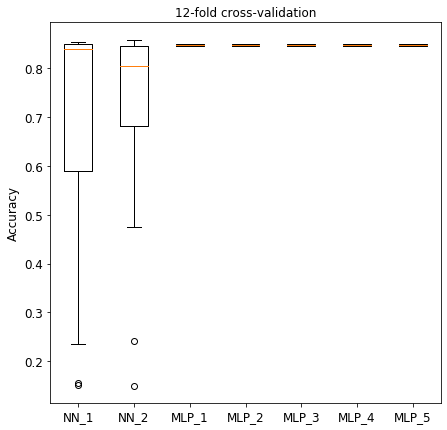

In [104]:
models = []
models.append(('NN_1', NN_1 ))
models.append(('NN_2', NN_2 ))
models.append(('MLP_1', MLP_1 ))
models.append(('MLP_2', MLP_2 ))
models.append(('MLP_3', MLP_3 ))
models.append(('MLP_4', MLP_4 ))
models.append(('MLP_5', MLP_5 ))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=12, shuffle = True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.figure(figsize=(7,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize = 12)
pyplot.boxplot(results, labels=names)
plt.ylabel('Accuracy', fontsize = 12)
pyplot.title('12-fold cross-validation')
pyplot.show()

### NN Evaluation: 2) ROC Curve

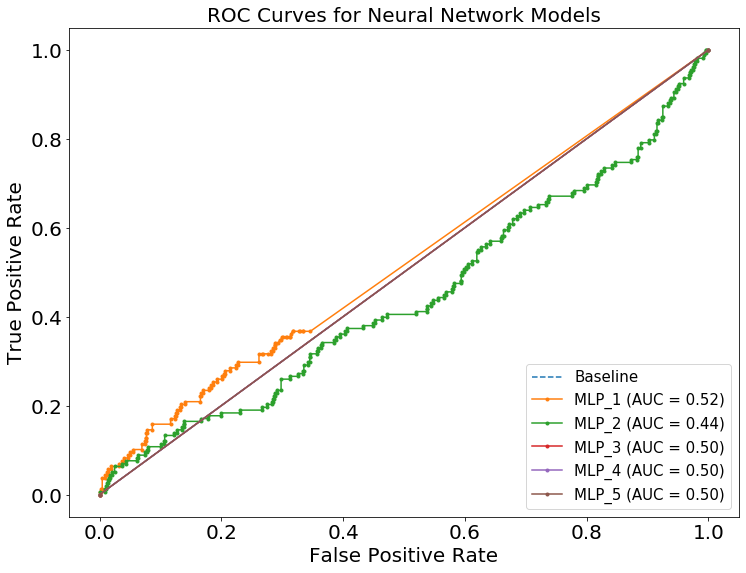

In [105]:
# generate a random prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]

# predict probabilities for different models
lr_probs3 = MLP_1.predict_proba(X_test)
lr_probs4 = MLP_2.predict_proba(X_test)
lr_probs5 = MLP_3.predict_proba(X_test)
lr_probs6 = MLP_4.predict_proba(X_test)
lr_probs7 = MLP_5.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs3 = lr_probs3[:, 1]
lr_probs4 = lr_probs4[:, 1]
lr_probs5 = lr_probs5[:, 1]
lr_probs6 = lr_probs6[:, 1]
lr_probs7 = lr_probs7[:, 1]

# calculate accuracy score for random prediction model
ns_auc = roc_auc_score(Y_test, ns_probs)

# calculate accuracy score different MLP models
lr_auc3 = roc_auc_score(Y_test, lr_probs3)
lr_auc4 = roc_auc_score(Y_test, lr_probs4)
lr_auc5 = roc_auc_score(Y_test, lr_probs5)
lr_auc6 = roc_auc_score(Y_test, lr_probs6)
lr_auc7 = roc_auc_score(Y_test, lr_probs7)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr3, lr_tpr3, _ = roc_curve(Y_test, lr_probs3)
lr_fpr4, lr_tpr4, _ = roc_curve(Y_test, lr_probs4)
lr_fpr5, lr_tpr5, _ = roc_curve(Y_test, lr_probs5)
lr_fpr6, lr_tpr6, _ = roc_curve(Y_test, lr_probs6)
lr_fpr7, lr_tpr7, _ = roc_curve(Y_test, lr_probs7)

# Configure plot size
plt.figure(figsize=(12,9))
plt.xticks(fontsize=20)
plt.yticks(fontsize = 20)

# axis labels
pyplot.xlabel('False Positive Rate', size = 20)
pyplot.ylabel('True Positive Rate', size = 20)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline')
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', label='MLP_1 (AUC = {1:0.2f})'
            ''.format(1,lr_auc3))
pyplot.plot(lr_fpr4, lr_tpr4, marker='.', label= 'MLP_2 (AUC = {1:0.2f})'
            ''.format(1,lr_auc4))
pyplot.plot(lr_fpr5, lr_tpr5, marker='.', label= 'MLP_3 (AUC = {1:0.2f})'
            ''.format(1,lr_auc5))
pyplot.plot(lr_fpr6, lr_tpr6, marker='.', label= 'MLP_4 (AUC = {1:0.2f})'
            ''.format(1,lr_auc6))
pyplot.plot(lr_fpr7, lr_tpr7, marker='.', label= 'MLP_5 (AUC = {1:0.2f})'
            ''.format(1,lr_auc7))

# show the legend
pyplot.legend(prop={'size': 15}, loc = 'lower right')
plt.title('ROC Curves for Neural Network Models', size = 20)
# show the plot
pyplot.show()